In [2]:
from google.colab import files
uploaded = files.upload()

Saving Car details v3.csv to Car details v3.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error , r2_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Car details v3.csv')

In [5]:
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
7218,Maruti 800 AC,1997,50000,60000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
3033,Hyundai i10 Magna 1.2 iTech SE,2011,250000,70000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.7Nm@ 4000rpm,5.0
3617,Maruti SX4 S Cross 2015-2017 DDiS 200 Zeta,2017,800000,60000,Diesel,Individual,Manual,First Owner,23.65 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
923,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2021,Maruti Alto 800 LXI,2016,240000,50000,Petrol,Individual,Manual,First Owner,22.74 kmpl,796 CC,47.3 bhp,69Nm@ 3500rpm,5.0


In [7]:
df.shape

(8128, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [12]:
df.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [13]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [14]:
df.dropna(inplace=True , ignore_index=True)

In [16]:
df.shape

(7906, 13)

In [17]:
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
2069,Volkswagen Polo Diesel Highline 1.2L,2013,350000,80000,Diesel,Individual,Manual,First Owner,22.07 kmpl,1199 CC,73.9 bhp,180Nm@ 2000rpm,5.0
4162,Ford Ikon 1.3 Flair,2005,120000,90000,Petrol,Individual,Manual,Second Owner,13.8 kmpl,1299 CC,70 bhp,"10.7@ 2,500(kgm@ rpm)",5.0
6307,Chevrolet Sail Hatchback LT ABS,2013,200000,80000,Diesel,Individual,Manual,First Owner,22.1 kmpl,1248 CC,76.9 bhp,205Nm@ 1750rpm,5.0
575,Maruti Zen Estilo VXI BSIV,2010,225000,59549,Petrol,Dealer,Manual,First Owner,19.0 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
3304,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0


**EXPLORATORY DATA ANALYSIS AND INSIGHTS**

*WHAT ARE THE TOP 10 MOST FREQUENT CAR BRANDS?*

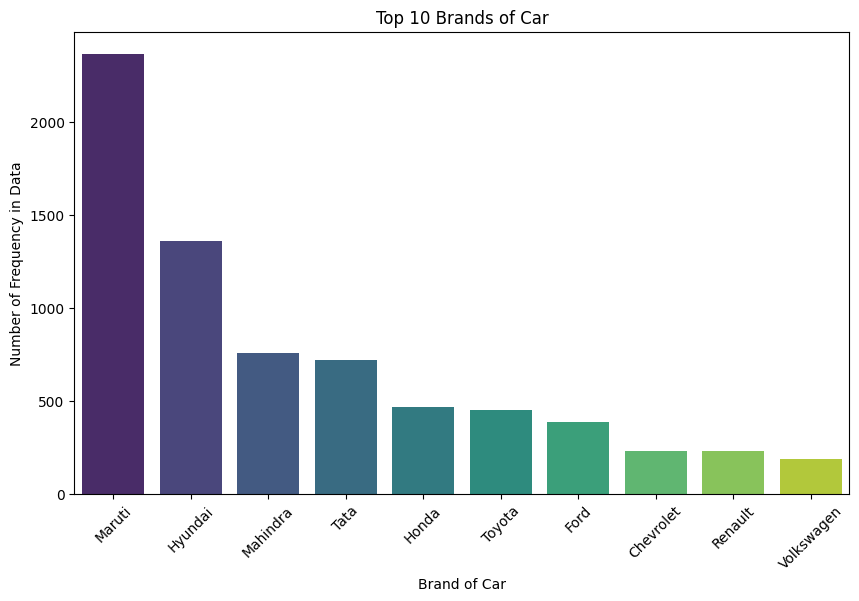

In [19]:
df['name'] = df['name'].str.split().str[0]

# Counting top 10 brands
brand_counts = df['name'].value_counts().nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Brand of Car")
plt.ylabel("Number of Frequency in Data")
plt.title("Top 10 Brands of Car")
plt.show()

Q. *HOW HAS THE TOTAL SELLING PRICE OF CARS CHANGED OVER THE YEARS?*

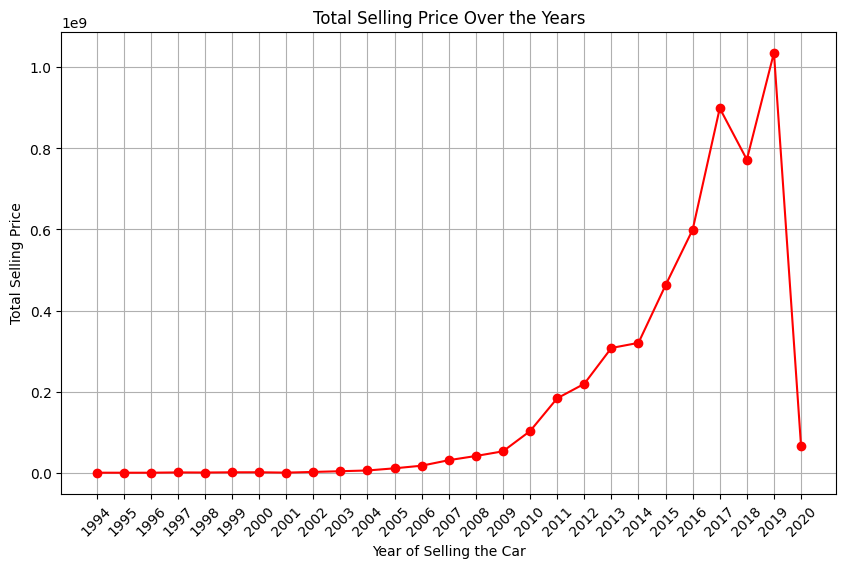

In [20]:
sum_price_years = df.groupby('year')['selling_price'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sum_price_years.index, sum_price_years.values, marker='o', linestyle='-', color='red')
plt.xlabel("Year of Selling the Car")
plt.ylabel("Total Selling Price")
plt.title("Total Selling Price Over the Years")
plt.grid(True)
plt.xticks(sum_price_years.index.astype(int) , rotation= 45)
plt.show()

*Q. HOW DOES TYPE OF FUEL AFFECT THE AVERAGE SELLING PRICE OF CARS?*

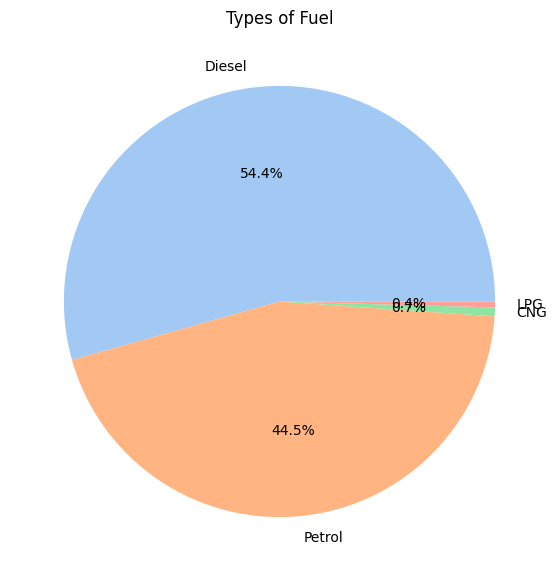

In [21]:
type_of_fuel = df['fuel'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(type_of_fuel.values, labels=type_of_fuel.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Types of Fuel")
plt.show()

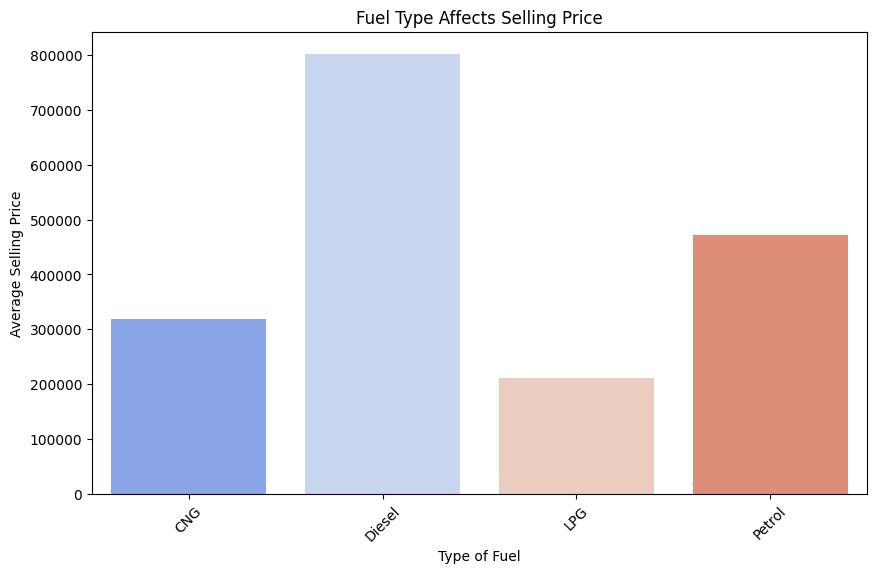

In [22]:
price_type_fuel = df.groupby('fuel')['selling_price'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=price_type_fuel.index, y=price_type_fuel.values, palette='coolwarm')
plt.xlabel("Type of Fuel")
plt.ylabel("Average Selling Price")
plt.title("Fuel Type Affects Selling Price")
plt.xticks(rotation=45)
plt.show()

*Q. HOW DOES THE TYPE OF TRANSMISSION AFFECT THE AVERAGE SELLING PRICE OF CARS?*

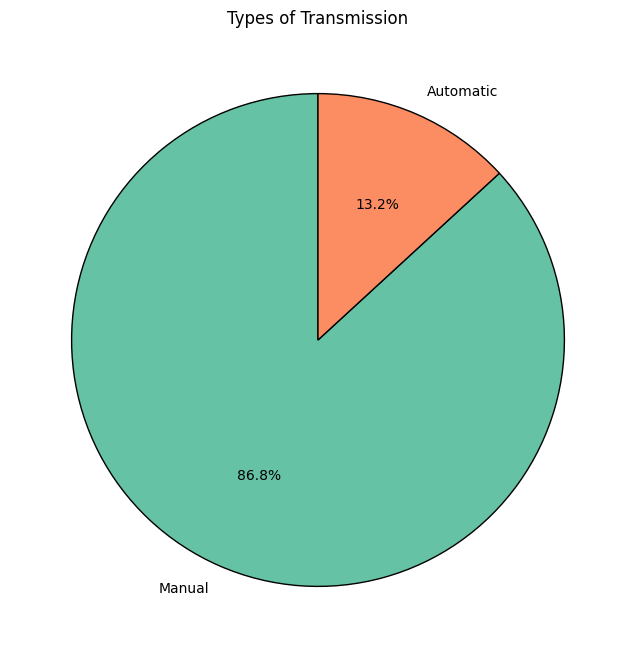

In [23]:
type_transmission = df['transmission'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_transmission.values, labels=type_transmission.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Types of Transmission")
plt.show()

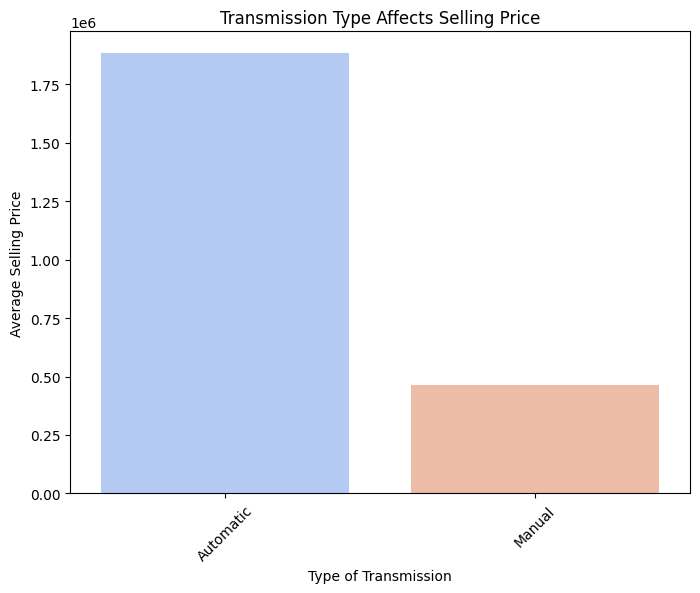

In [24]:
selling_price_transmission = df.groupby('transmission')['selling_price'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=selling_price_transmission.index, y=selling_price_transmission.values, palette='coolwarm')
plt.xlabel("Type of Transmission")
plt.ylabel("Average Selling Price")
plt.title("Transmission Type Affects Selling Price")
plt.xticks(rotation=45)
plt.show()

*Q. HOW DOES SELLER AFFECT AVERAGE SELLING PRICE OF CARS?*

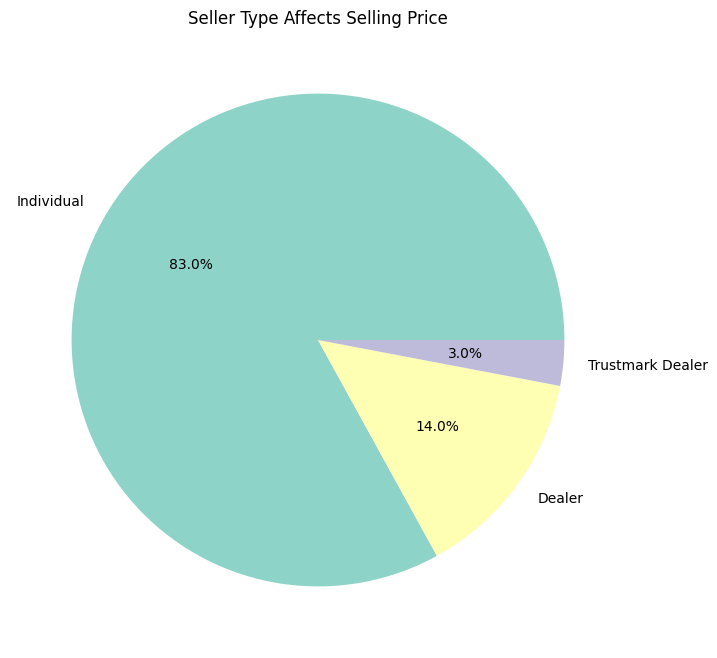

In [25]:
seller_types = df['seller_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(seller_types.values, labels=seller_types.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title("Seller Type Affects Selling Price")
plt.show()

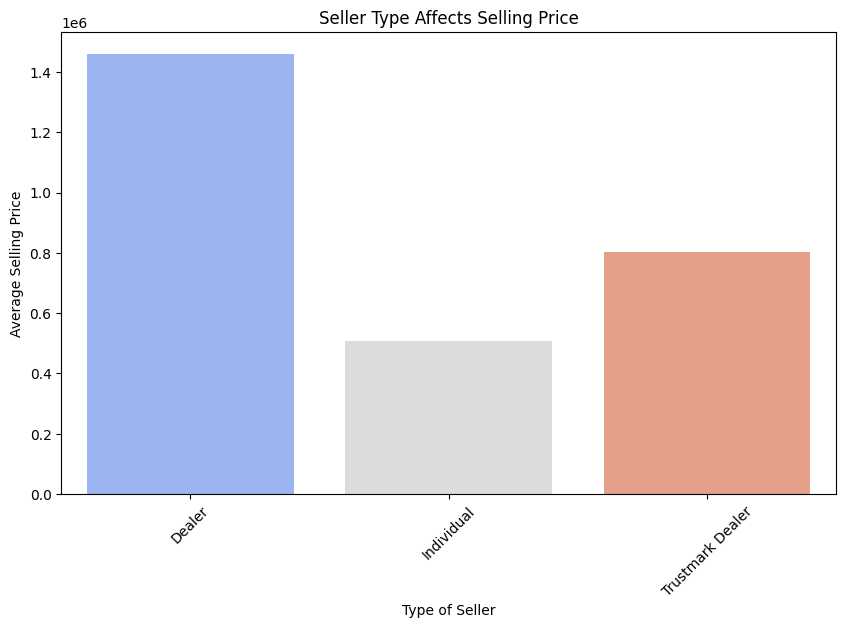

In [26]:
selling_price_seller_types = df.groupby('seller_type')['selling_price'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=selling_price_seller_types.index, y=selling_price_seller_types.values, palette='coolwarm')
plt.xlabel("Type of Seller")
plt.ylabel("Average Selling Price")
plt.title("Seller Type Affects Selling Price")
plt.xticks(rotation=45)
plt.show()

*Q. HOW DOES THE NUMBER OF PREVIOUS OWNER AFFECT THE SELLING PRICE OF CARS?*

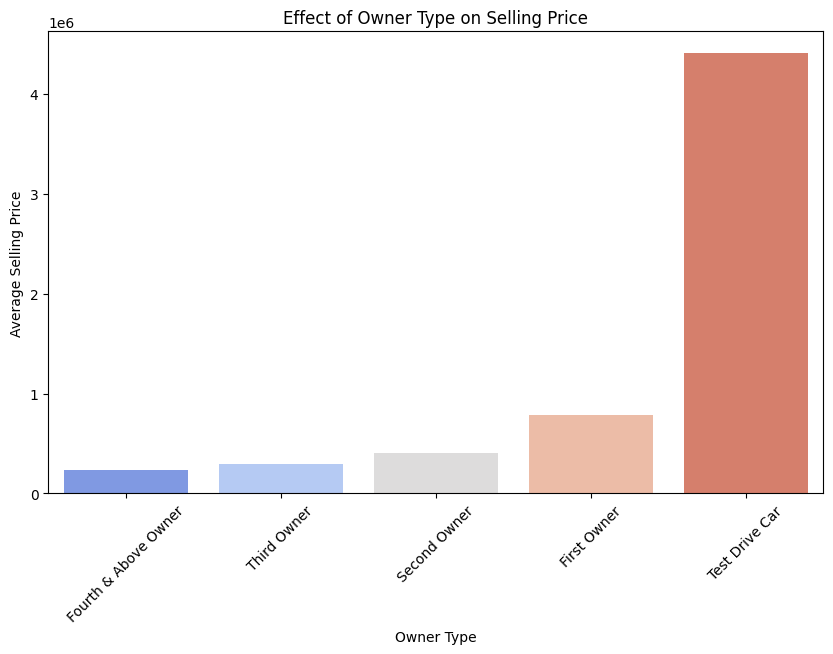

In [27]:
owner_price = df.groupby('owner')['selling_price'].mean().sort_values()

#Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=owner_price.index, y=owner_price.values, palette='coolwarm')

# Labels & Title
plt.xlabel("Owner Type")
plt.ylabel("Average Selling Price")
plt.title("Effect of Owner Type on Selling Price")
plt.xticks(rotation=45)

plt.show()

**DATA PREPROCESSING**

In [28]:
df[['mileage','engine','max_power']]

,mileage,engine,max_power
0,23.4 kmpl,1248 CC,74 bhp
1,21.14 kmpl,1498 CC,103.52 bhp
2,17.7 kmpl,1497 CC,78 bhp
3,23.0 kmpl,1396 CC,90 bhp
4,16.1 kmpl,1298 CC,88.2 bhp
...,...,...,...
7901,18.5 kmpl,1197 CC,82.85 bhp
7902,16.8 kmpl,1493 CC,110 bhp
7903,19.3 kmpl,1248 CC,73.9 bhp
7904,23.57 kmpl,1396 CC,70 bhp


In [29]:
cols_to_clean = ['mileage', 'engine', 'max_power']
df[cols_to_clean] = df[cols_to_clean].replace(r'[^0-9.]', '', regex=True).astype(float)

In [30]:
df[['mileage','engine','max_power']]

,mileage,engine,max_power
0,23.40,1248.0,74.00
1,21.14,1498.0,103.52
2,17.70,1497.0,78.00
3,23.00,1396.0,90.00
4,16.10,1298.0,88.20
...,...,...,...
7901,18.50,1197.0,82.85
7902,16.80,1493.0,110.00
7903,19.30,1248.0,73.90
7904,23.57,1396.0,70.00


In [31]:
df.drop('torque' , axis = 1 , inplace = True)

In [32]:
df.rename(columns={'year': 'age'}, inplace=True)
df['age'] = 2025 - df['age']

In [33]:
df.head()

,name,age,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,11,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,11,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,19,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,15,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,18,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


**ENCODING DATA**

In [34]:
le = LabelEncoder()
df['name'] = le.fit_transform(df['name'])

In [35]:
owner_order = [['Test Drive Car', 'First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner']]
oe = OrdinalEncoder(categories=owner_order)
df['owner'] = oe.fit_transform(df[['owner']])

In [36]:
categorical_cols = ['fuel', 'seller_type', 'transmission']  # Nominal
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df = df.astype(int)

print(df.head())

   name  age  selling_price  km_driven  owner  mileage  engine  max_power  \
0    20   11         450000     145500      1       23    1248         74   
1    26   11         370000     120000      2       21    1498        103   
2    10   19         158000     140000      3       17    1497         78   
3    11   15         225000     127000      1       23    1396         90   
4    20   18         130000     120000      1       16    1298         88   

   seats  fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Individual  \
0      5            1         0            0                       1   
1      5            1         0            0                       1   
2      5            0         0            1                       1   
3      5            1         0            0                       1   
4      5            0         0            1                       1   

   seller_type_Trustmark Dealer  transmission_Manual  
0                             0                  

**SCALING THE VALUES**

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])  # Scale all columns

print(df.head())

       name       age  selling_price  km_driven     owner   mileage    engine  \
0  0.318278 -0.004158      -0.245613   1.343777 -0.628935  0.988894 -0.418188   
1  1.166997 -0.004158      -0.343950   0.894744  0.787288  0.496781  0.077980   
2 -1.096253  2.066530      -0.604542   1.246926  2.203511 -0.487445  0.075995   
3 -0.954799  1.031186      -0.522185   1.018008 -0.628935  0.988894 -0.124457   
4  0.318278  1.807694      -0.638960   0.894744 -0.628935 -0.733501 -0.318955   

   max_power     seats  fuel_Diesel  fuel_LPG  fuel_Petrol  \
0  -0.483370 -0.434128     0.915987 -0.066684    -0.895854   
1   0.328261 -0.434128     0.915987 -0.066684    -0.895854   
2  -0.371421 -0.434128    -1.091718 -0.066684     1.116254   
3  -0.035574 -0.434128     0.915987 -0.066684    -0.895854   
4  -0.091548 -0.434128    -1.091718 -0.066684     1.116254   

   seller_type_Individual  seller_type_Trustmark Dealer  transmission_Manual  
0                0.452363                     -0.175412      

**ASSIGNNG FEATURES AND TARGET VARIABLES**

In [38]:
X = df.drop('selling_price' , axis = 1)
y = df['selling_price']

In [39]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 44 , shuffle = True)

In [40]:
print(f'Shape of X_Train {X_train.shape}')
print(f'Shape of X_Test {X_test.shape}')
print(f'Shape of Y_Train {y_train.shape}')
print(f'Shape of Y_Test {y_test.shape}')

Shape of X_Train (5929, 14)
Shape of X_Test (1977, 14)
Shape of Y_Train (5929,)
Shape of Y_Test (1977,)


In [41]:
df_results = pd.DataFrame(columns=["Model", "Testing Accuracy (%)"])

**LINEAR REGRESSION**

In [42]:
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=10)

lr.fit(X_train, y_train)

print("Cross-Validation Score:", scores.mean() * 100)
print("Training Accuracy:", lr.score(X_train, y_train) * 100)
print("Testing Accuracy:", lr.score(X_test, y_test) * 100)
print("R² Score:", r2_score(y_test, lr.predict(X_test)) * 100)

df_results.loc[len(df_results)] = ["Linear Regression", lr.score(X_test, y_test) * 100]

Cross-Validation Score: 66.14491915199604
Training Accuracy: 67.73261727805418
Testing Accuracy: 69.0175767931842
R² Score: 69.0175767931842


**RANDOM FOREST**

In [44]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10)

rf_model.fit(X_train, y_train)

print("Training Accuracy:", rf_model.score(X_train, y_train) * 100)
print("Testing Accuracy:", rf_model.score(X_test, y_test) * 100)

print("R² Score:", r2_score(y_test, rf_model.predict(X_test)) * 100)

df_results.loc[len(df_results)] = ["Random Forest", rf_model.score(X_test, y_test) * 100]

Training Accuracy: 98.84626405353343
Testing Accuracy: 97.02314652070199
R² Score: 97.02314652070199


**XGBOOST**

In [45]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

xgb_model.fit(X_train, y_train)

print("Training Accuracy:", xgb_model.score(X_train, y_train) * 100)
print("Testing Accuracy:", xgb_model.score(X_test, y_test) * 100)

print("R² Score:", r2_score(y_test, xgb_model.predict(X_test)) * 100)

df_results.loc[len(df_results)] = ["XGBoost", xgb_model.score(X_test, y_test) * 100]

Training Accuracy: 96.97466073664275
Testing Accuracy: 95.8521183971291
R² Score: 95.8521183971291


**COMPARING TESTING ACCURACY OF THREE MODELS**

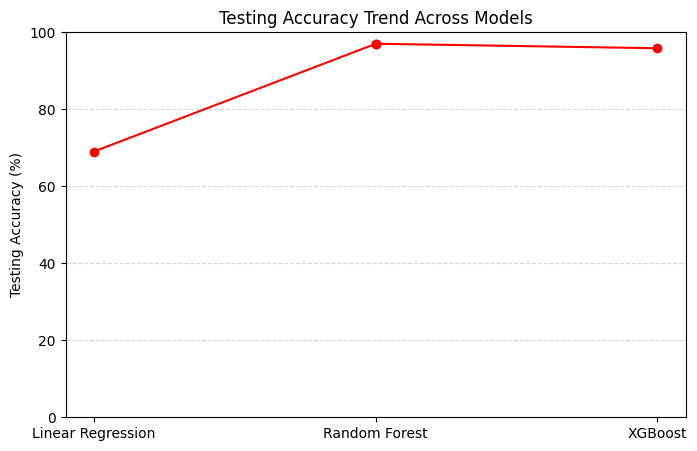

In [46]:
plt.figure(figsize=(8, 5))
plt.plot(df_results["Model"], df_results["Testing Accuracy (%)"], marker='o', linestyle='-', color='red')
plt.title("Testing Accuracy Trend Across Models")
plt.ylabel("Testing Accuracy (%)")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle="--", alpha=0.5)  # alpha → Transparency of the line
plt.show()


**HYPERPARAMETER TUNING**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200 , 300],
    'max_depth': [5, 10, 15],
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)